# Introduction

The notebooks within this directory follow on from one another (i.e., the analysis is too long for a single notebook) with material being broken down into sections. These notebooks will cover the following:

 * Image normalisation
 * Extracting training data
 * Training and Applying multiple classifiers
 * Defining accuracy reference points
 * Using existing accuracy reference points
 * Calculating accuracy statistics
 * Comparing the accuracy of multiple classifiers
 * Applying XGBoost classifier
 * Undertaking a hierarchical classification using machine learning.


## Machine Learning Libraries

### Scikit-Learn

The scikit-learn library is the most commonly used machine learning library in Python with access to many classification, clustering and regression algorithms. This includes commonly used algorithms such as:

 - Random Forests
 - Support Vector Machines
 - Neural Networks


### XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. For classification boosting is a process by which classifiers are layered on each other with the second trained to classify those samples which the first miss classifies. 

### LightGBM

Similar to the XGBoost library, the LightGBM library is primarily focused on the application of Gradient Boosted Decision Trees. Boosting is a process by which classifiers are layered on each other with the second trained to classify those samples which the first miss classifies. Although not used within this tutorial, RSGISLib does provide functions to use this library see http://rsgislib.org/rsgislib_classification_classlightgbm.html

### Keras / Tensorflow

Keras and Tensorflow are focused on the creation and application of Neural Networks. Specifically, the creation of large complex networks which are commonly referred to as deep learning classifiers. Again, these notebooks will note cover using the functions but there are functions for using this module in RSGISLib: http://rsgislib.org/rsgislib_classification_classkeraspxl.html and http://rsgislib.org/rsgislib_classification_classkeraschips.html

## Running Notebook

The notebook has been run and saved with the outputs so you can see what the outputs should be and so the notebook and be browsed online without having to run the notebook for it to make sense. 

If you are running the notebook for yourself it is recommended that you clear the existing outputs which can be done by running one of the following options depending on what system you are using:

**Jupyter-lab**:

> \> _Edit_ \> _'Clear All Outputs'_

**Jupyter-notebook**:

> \> _Cell_ \> _'All Outputs'_ \> _Clear_


# Sentinel-2 Image

For this exercise you will use a Sentinel-2 scene from the Aberystwyth area from 29th June 2018 (Figure 1). This image has been processed using the ARCSI software (https://arcsi.remotesensing.info) to derive a surface reflectance product that has also been topographically corrected. It should be noted that the summer of 2018 was particularly dry and therefore many of the grasslands have a low NIR reflectance with a large amount of non-photosynthetic vegetation.


In [1]:
# Input Sentinel-2 image file with 20 m resolution pixels.
input_img = "../data/sen2_20180629_t30uvd_orb037_osgb_stdsref_20m.tif"

Image Data Size: 1250 x 1250


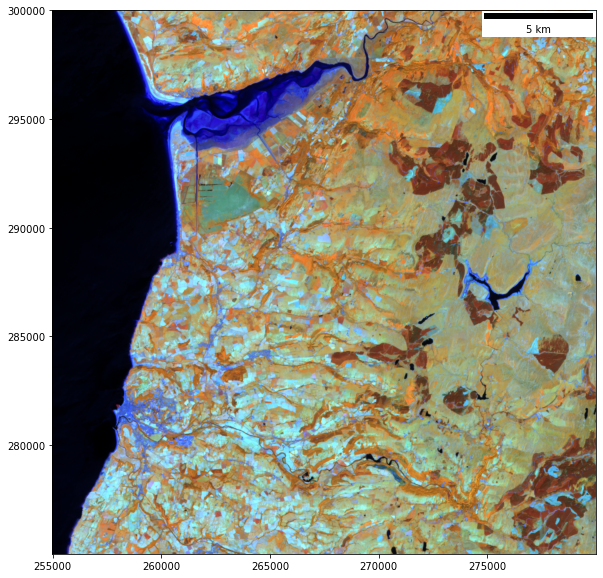

In [2]:
# Import the matplotlib plotting module and set it to work within
# a notebook environment.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import rsgislib.tools.mapping

# Define a bbox for the subset to be displayed try
# some different subsets to pan and zoom around the
# scene.
# Note. Setting this variable to None will show
# the whole scene.
# sub_img_bbox = None
sub_img_bbox = [255000, 280000, 275000, 300000]
# sub_img_bbox = [275000, 300000, 275000, 300000]
# sub_img_bbox = [295000, 300000, 295000, 300000]

# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(10, 10))

rsgislib.tools.mapping.create_raster_img_map(
    ax,
    input_img,
    img_bands=[8, 9, 3],
    bbox=sub_img_bbox,
    img_stch=rsgislib.IMG_STRETCH_STDEV)

# Legend for Classification - i.e., classes

You have been provided with training for the following classes:

- Conifer Forest
- Deciduous Forest
- Water
- Artificial Surfaces (i.e., Urban)
- Non-Photosynthetic Vegetation
- Bare Rock and Sand
- Scrub
- Bracken
- Grass Short
- Grass Long

These are within the `aber_sen2_cls_training.gpkg` file as separate layers.

In [3]:
vec_train_file = "../data/cls_data/aber_sen2_cls_training.gpkg"

In [4]:
# Import the rsgislib vectorutils module
import rsgislib.vectorutils

# Get the list of layers within the vector file.
lyr_names = rsgislib.vectorutils.get_vec_lyrs_lst(vec_train_file)

# Print out the layer names by looping through the list of layers returned.
# Note. the enumerate function returns the array index and the list value:
for i, lyr_name in enumerate(lyr_names):
    print(f"{i+1}:\t{lyr_name}")

1:	Artificial_Surfaces
2:	Bare_Rock_Sand
3:	Conifer_Forest
4:	Deciduous_Forest
5:	Grass_Long
6:	Grass_Short
7:	NonPhotosynthetic_Vegetation
8:	Scrub
9:	Water_Training
10:	Bracken
